#Analisando a Violência no Rio de Janeiro
É fato que a violência atinge todas as cidades do Brasil, e vem ganhando destaque nos noticiários, cada vez mais. Atualmente, as leis de acesso à informação e a conscientização dos órgãos públicos, vêm proporcionando a disponibilização de várias fontes de dados. Como exemplo, o governo do Rio de Janeiro traz a iniciativa do portal ISPDados. Neste projeto faremos uma análise em cima dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas.

## Obtenção dos Dados

Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

No caso do dataset a ser utilizado aqui, o arquivo csv pode ser baixado diretamente neste [link](https://raw.githubusercontent.com/joaodrj/data_science/main/datasets/violencia_rio.csv).

### Importando os dados

In [23]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df = pd.read_csv("https://raw.githubusercontent.com/joaodrj/data_science/main/datasets/violencia_rio.csv")

Primeiro vamos verificar as 5 primeiras entradas do nosso dataset


In [2]:
#Verifica as 5 primeiras entradas do dataset
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


##Analise inicial dos dados
Como podemos ver o nosso arquivo tem 344 linhas e 56 colunas.

In [3]:
#Verifica o tamanho do DataFrame
print("Linhas:",df.shape[0])
print("Colunas:",df.shape[1])

Linhas: 344
Colunas: 56


In [4]:
#Verifica os nomes das colunas do DataFrame
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Podemos ver também que todas as nossas colunas são do tipo de dado int64 ou float64, ou seja, são colunas que contêm dados numéricos.

In [5]:
#Verifica os tipos das variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Vamos verificar agora as ultimas entradas do nosso dataset, podemos ver que os ultimos registros foram em 2019.

In [6]:
#Verifica as ultimas 5 entradas do dataset
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,...,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,...,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,...,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,...,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,...,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Vamos verificar a porcentagem de dados faltantes no nosso dataset

In [7]:
#Ver a porcentagem de valores faltantes das colunas
df.isnull().sum() / df.shape[0]

vano                          0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.279070
latrocinio                    0.000000
hom_por_interv_policial       0.244186
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.418605
hom_culposo                   0.244186
lesao_corp_culposa            0.279070
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_transeunte              0.000000
roubo_em_coletivo             0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.418605
roubo_celular                 0.313953
roubo_conducao_saque          0.418605
roubo_apos_saque              0.418605
roubo_bicicleta               0.802326
outros_roubos                 0.000000
total_roubos                  0.000000
furto_veiculos           

###Informações Estatísticas da Violência no Rio de Janeiro

Com os dados que temos, podemos fazer análises estatísticas a fim de chegarmos a algumas conclusões referentes à violência no estado do Rio de Janeiro. Com a função 'describe()', visualizamos informações como: a média de todos os valores de uma coluna (mean), a quantidade de valores válidos em cada coluna (count), o desvio-padrão dos valores de cada coluna (std), o valor máximo de cada coluna (max), o valor mínimo de cada coluna (min) e os quartis.

In [8]:
#Imprime os resultados estatísticos do DataFrame
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,...,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,...,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,...,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,...,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,...,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,...,427.000000,60.500000,3.000000,2.000000,0.00000,590.000000,4190.000000,2322.000000,54926.500000,3.000000
75%,2012.000000,9.000000,577.250000,6.000000,19.000000,96.25000,398.250000,6582.500000,441.250000,236.250000,...,481.500000,87.000000,4.000000,3.000000,1.00000,649.000000,6872.750000,2778.000000,63292.500000,3.000000
max,2019.000000,12.000000,831.000000,21.000000,36.000000,194.00000,645.000000,9050.000000,561.000000,449.000000,...,628.000000,217.000000,13.000000,10.000000,3.00000,848.000000,13833.000000,5358.000000,75403.000000,3.000000


###Roubos/Furtos e Recuperação de Veículos

E se estivermos interessados em saber somente sobre assaltos, furtos e recuperação de veículos? Podemos visualizar somente esses dados. A utilização da função 'copy()' faz com que possamos trabalhar em um novo dataframe sem interferir no original, que pode vir a ser utilizado a qualquer momento, com os seus dados originais.

In [9]:
# criando um novo dataframe somente com as colunas referentes a roubos, furtos e recuperações de veículos

df_veiculos = df[['vano', 'mes', 'roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']].copy()
df_veiculos[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']].describe()

,roubo_veiculo,furto_veiculos,recuperacao_veiculos
count,344.000000,344.000000,344.000000
mean,2448.697674,1674.671512,1772.238372
std,789.689559,294.852020,656.761843
min,1097.000000,1159.000000,729.000000
25%,1889.750000,1430.500000,1276.750000
50%,2322.000000,1637.500000,1755.000000
75%,2778.000000,1833.250000,2202.000000
max,5358.000000,2630.000000,3695.000000


Vamos ver a distribuição dos nossos dados em um formato gráfico. Para isso, utilizaremos gráficos no formato de caixas (boxplot). Nestes gráficos, podemos ver uma linha verde que representa o segundo quartil, ou seja, a mediana. A mediana é o valor que se encontra no meio dos dados, quando ordenados do menor para o maior. Olhando os gráficos, notamos que:

* Há meses com mais de 4.000 roubos a veículos registrados;
* Foram registrados mais roubos do que furtos a veículos;
* Há pelo menos um registro com mais de 3.500 recuperações de veículos em um mês.

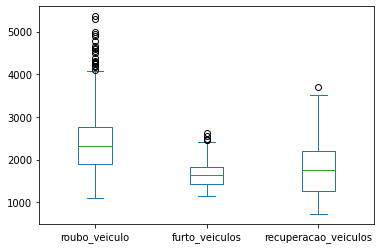

In [10]:
# boxplot com os valores das colunas roubo_veiculo, furto_veiculos e recuperacao_veiculos

df_veiculos[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']].plot(kind = 'box');

Agora verificamos a media de roubo, furto e recuperação de veiculos.

In [11]:
#Ver a media da variável roubo de veiculos
mean_roubo_veiculo = df.roubo_veiculo.mean()
print(mean_roubo_veiculo)

2448.6976744186045


In [12]:
#Ver a media da variável furto de veiculos
mean_furto_Veiculos = df.furto_veiculos.mean()
print(mean_furto_Veiculos)

1674.671511627907


In [13]:
#Ver a media da variável recuperação de veiculos
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()
print(mean_recuperacao_veiculos)

1772.2383720930231


In [14]:
# ver a porcentagem de carros recuperados em relação aos carros roubados + carros furtados
mean_recuperacao_veiculos / (mean_roubo_veiculo + mean_furto_Veiculos)

0.42980346705075084

###Homicídio Doloso

Vendo graficamente poderemos ter uma melhor ideia do que os nossos dados estão nos dizendo, mas, antes disso, vamos dar uma olhada nos valores da coluna 'hom_doloso'.

In [21]:
#Valores Max e Min de hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()
mean_hom_doloso = df.hom_doloso.mean()
median_hom_doloso = df.hom_doloso.median()

#imprimir os valores maximos e minimos
print("Max:\t{}".format(max_hom_doloso))
print("Min:\t{}".format(min_hom_doloso))
print("Media:\t{}".format(mean_hom_doloso))
print("Mediana: {}".format(median_hom_doloso))

Max:	831
Min:	272
Media:	504.55523255813955
Mediana: 507.0


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


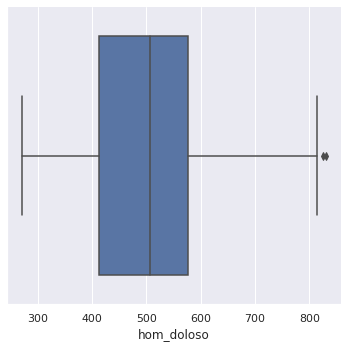

In [28]:
# gráfico de caixa para vermos a distribuição dos dados de homicídios dolosos

sns.catplot(orient='v', x='hom_doloso', kind="box", data=df);

## Visualização de Dados


Vamos dar uma breve olhada nas informações referentes a roubos em coletivos. Podemos utilizar gráficos de linhas para vermos os nossos dados, que também nos permite ver que há registros de meses com mais de 1200 roubos em coletivos.

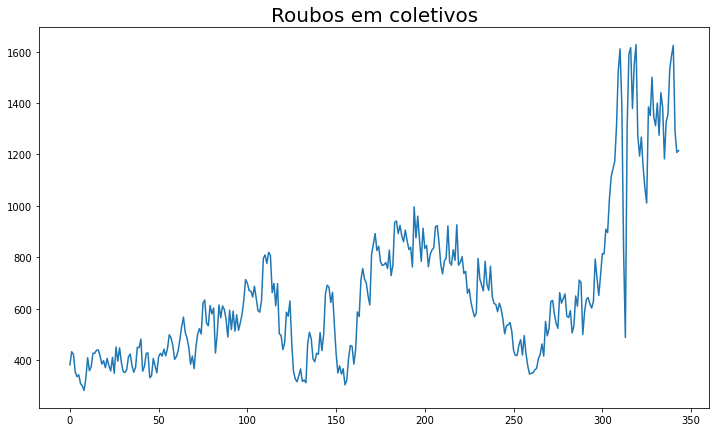

In [17]:
#plotar gráfico de linha para roubo_em_coletivo
plt.figure(figsize=(12,7))
plt.title("Roubos em coletivos", fontsize=20)
df.roubo_em_coletivo.plot();

Podemos ver que nos últimos anos tivemos um aumento expressivo de roubos em coletivos.

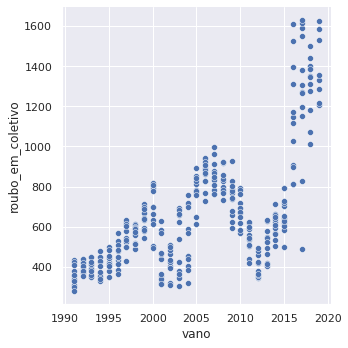

In [32]:
# visualizando a correlação de roubo em coletivo e ano de sua ocorrência

sns.relplot(x="vano", y="roubo_em_coletivo", data=df);

Olharemos também as informações referentes a homicídios dolosos. Aparentemente, antigamente eram registrados mais homicídios dolosos do que nos anos atuais.

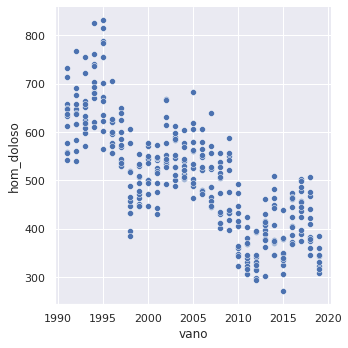

In [33]:
# visualizando a correlação entre homicídio doloso e ano de sua ocorrência

sns.relplot(x="vano", y="hom_doloso", data=df);

No histograma podemos ver a frequência dos nossos dados. Notamos que aqueles que fogem da região onde os dados estão concentrados são valores que não são muito frequentes, ou até mesmo, que são discrepantes. Podemos ver que em quase 70 meses tivemos em torno de 500 a 550 registros de homicídios dolosos.

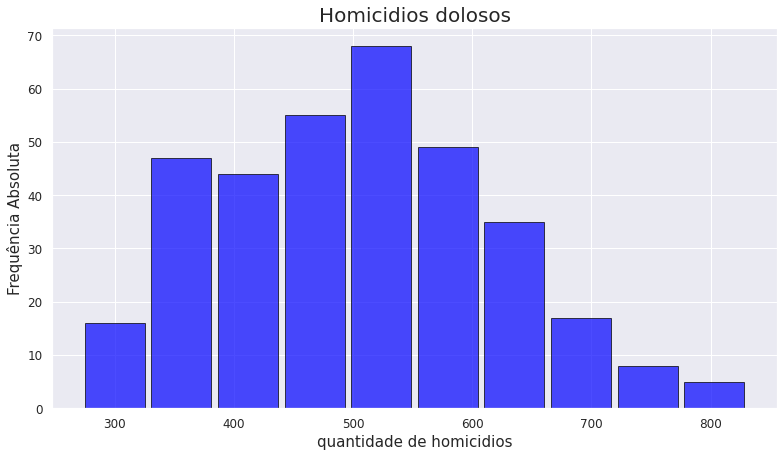

In [36]:
#plotar histograma de hom_doloso
plt.figure(figsize=(13,7))
plt.title('Homicidios dolosos', fontsize=20)
plt.xlabel('quantidade de homicidios', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.tick_params(labelsize=12)
plt.hist(df.hom_doloso, 10, rwidth=0.9, color='blue', alpha=0.7, edgecolor='black')
plt.show()

No gráfico de linhas, podemos ver que as tentativas de homicídios aumentaram e os homicídios dolosos e culposos diminuíram.

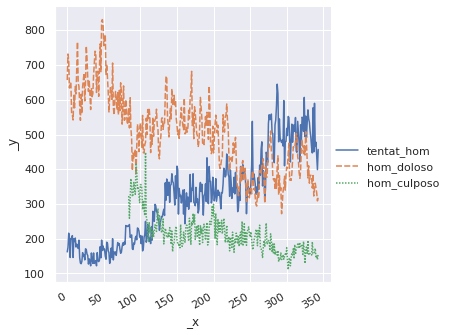

In [38]:
from IPython.core.pylabtools import figsize
# visualizando os dados de homicídios dolosos, homicídios culposos e tentativos de homicídios em um gráfico de linhas

g = sns.relplot(kind="line", data=df[['tentat_hom', 'hom_doloso', 'hom_culposo']])
g.fig.autofmt_xdate()

## Conclusão
Após analisarmos diversos indicadores de violência no estado do Rio de Janeiro, pode-se dizer que, de acordo com os dados do (ISPDados), nos tempos atuais, acontecem:

* Mais roubos em coletivos;
* Menos homicídios dolosos e culposos;
* Mais tentativas de homicídio;
*Menos furtos de veículos;
*Mais roubos de veículos;
*Mais recuperações de veículos.